### Script 1. 欧式期权的BS定价与Greeks

In [ ]:
import deriv_func as defu
import pandas as pd
days=90
# S0,K,T,sigma,r = 100, 105, days/365, 0.2, 0.02
S0,K,T,sigma,r=1,1,1,0.13,0.03
# 看涨期权计算
call_price=defu.bs_european_option_pricing(S0,K,T,sigma,r)
call_delta=defu.bs_european_option_greeks(S0,K,T,sigma,r,type='call',greekstype='delta')
call_gamma=defu.bs_european_option_greeks(S0,K,T,sigma,r,type='call',greekstype='gamma')
call_theta=defu.bs_european_option_greeks(S0,K,T,sigma,r,type='call',greekstype='theta')/365
call_vega=defu.bs_european_option_greeks(S0,K,T,sigma,r,type='call',greekstype='vega')
call_rho=defu.bs_european_option_greeks(S0,K,T,sigma,r,type='call',greekstype='rho')
# 看跌期权计算
put_price=defu.bs_european_option_pricing(S0,K,T,sigma,r,type='put')
put_delta=defu.bs_european_option_greeks(S0,K,T,sigma,r,type='put',greekstype='delta')
put_gamma=defu.bs_european_option_greeks(S0,K,T,sigma,r,type='put',greekstype='gamma')
put_theta=defu.bs_european_option_greeks(S0,K,T,sigma,r,type='put',greekstype='theta')/365
put_vega=defu.bs_european_option_greeks(S0,K,T,sigma,r,type='put',greekstype='vega')
put_rho=defu.bs_european_option_greeks(S0,K,T,sigma,r,type='put',greekstype='rho')
# 输出表格
european_option_df=pd.DataFrame([[call_price,call_delta,call_gamma,call_theta,call_vega,call_rho],
                                  [put_price,put_delta,put_gamma,put_theta,put_vega,put_rho]],
                                  columns=['price','delta','gamma','theta','vega','rho'],index=['call','put'])
print(european_option_df)
print('注：theta按年计算后除以365')

### Script 2. 欧式期权的隐含波动率

In [ ]:
import deriv_func as defu
import pandas as pd
days=90
S0,K,T,r = 100, 105, days/365, 0.02
call_price=2.195586
call_impvola=defu.bs_european_option_impvola(call_price,S0,K,T,r,type='call')
put_price=6.679052
put_impvola=defu.bs_european_option_impvola(put_price,S0,K,T,r,type='put')
print('call_impvola=',call_impvola,'put_impvola=',put_impvola)

### Script 3. 欧式期权价值对标的价格的函数图像

In [ ]:
import deriv_func as defu
# 期权参数设定
days=90
S0_min, S0_max=90, 120
granularity=1
K,T,sigma,r = 105, days/365,0.2, 0.02
# 期权设为欧式看跌期权
bs_european_option_fig=lambda S0: defu.bs_european_option_pricing(S0,K,T,sigma,r,type='put')
# 用defu.fig_anyfunc绘图
defu.fig_anyfunc(bs_european_option_fig,S0_min,S0_max,granularity,xlabel='S0',ylabel='option_value',title='european_put_option_value')


### Script 4. 模拟1000条T=1，timepoint_num=252的 geometric brownian motion(风险中性测度漂移项)

,0,1,2,3,4,5,6,7,8,9,...,243,244,245,246,247,248,249,250,251,252
count,1000.0,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,1.0,1.000214,1.000349,1.000462,1.000874,1.001139,1.001812,1.002259,1.001787,1.002020,...,1.029580,1.029356,1.029021,1.028935,1.029294,1.029660,1.030114,1.030349,1.030711,1.030575
std,0.0,0.008468,0.012023,0.014376,0.016552,0.018587,0.019879,0.021871,0.023349,0.025182,...,0.133410,0.134068,0.134367,0.134457,0.133778,0.133593,0.134359,0.134285,0.134821,0.135232
min,1.0,0.971605,0.966097,0.952253,0.946607,0.946709,0.942036,0.936254,0.935586,0.936735,...,0.641353,0.633428,0.631141,0.629119,0.631000,0.637937,0.645683,0.647264,0.652299,0.645448
25%,1.0,0.994620,0.991831,0.991134,0.990047,0.989339,0.988401,0.987444,0.986297,0.985019,...,0.933779,0.931223,0.931762,0.931218,0.933118,0.932819,0.934166,0.933976,0.934255,0.933765
50%,1.0,1.000096,1.000350,1.000500,1.001122,1.001056,1.001748,1.001510,1.001193,1.000664,...,1.027382,1.025675,1.026416,1.027053,1.026932,1.026879,1.027702,1.028464,1.027638,1.028460
75%,1.0,1.005607,1.008515,1.009751,1.011753,1.014160,1.015367,1.017466,1.017839,1.018859,...,1.112909,1.116238,1.113204,1.111538,1.111003,1.111864,1.110107,1.111224,1.112661,1.111141
max,1.0,1.029680,1.039161,1.043452,1.049878,1.057156,1.057592,1.061718,1.071764,1.089840,...,1.610894,1.623366,1.645452,1.632993,1.625629,1.614976,1.628026,1.629132,1.628133,1.614455


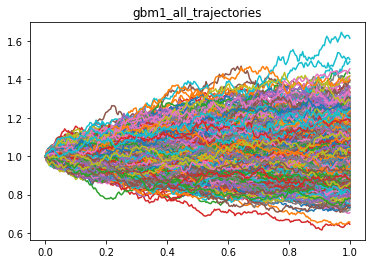

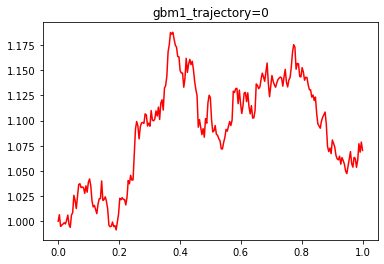

In [4]:
import simu_func as sifu
r=0.03
sigma=0.13
trajectory_num=1000
T=1
timepoint_num=252
bm1=sifu.geometric_brownian_motion('gbm1',T,timepoint_num,trajectory_num,drift=r-0.5*(sigma**2),diffusion=sigma,start_value=1)
bm1_process_matrix=bm1.process_matrix
# 绘制bm1所有序列
bm1.trajactory_fig(which_traj='all')
# 绘制bm1第0条序列
bm1.trajactory_fig(which_traj=0)
bm_data=bm1_process_matrix.T
import pandas as pd
bm_data_DF=pd.DataFrame(bm_data)
bm_data_DF.describe()

In [3]:
import numpy as np
np.log(bm_data_DF).describe()

,0,1,2,3,4,5,6,7,8,9,...,243,244,245,246,247,248,249,250,251,252
count,1000.0,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,...,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03
mean,0.0,3.968254e-03,7.936508e-03,1.190476e-02,1.587302e-02,1.984127e-02,2.380952e-02,2.777778e-02,3.174603e-02,3.571429e-02,...,9.642857e-01,9.682540e-01,9.722222e-01,9.761905e-01,9.801587e-01,9.841270e-01,9.880952e-01,9.920635e-01,9.960317e-01,1.000000e+00
std,0.0,3.210844e-17,4.338979e-17,1.961218e-16,1.735591e-17,4.165420e-17,4.373691e-16,5.692740e-16,2.082710e-17,4.651385e-16,...,1.721707e-14,8.664073e-15,1.910539e-14,6.886827e-15,2.099371e-14,6.220360e-15,2.210449e-14,4.443114e-15,2.399282e-14,2.999102e-15
min,0.0,3.968254e-03,7.936508e-03,1.190476e-02,1.587302e-02,1.984127e-02,2.380952e-02,2.777778e-02,3.174603e-02,3.571429e-02,...,9.642857e-01,9.682540e-01,9.722222e-01,9.761905e-01,9.801587e-01,9.841270e-01,9.880952e-01,9.920635e-01,9.960317e-01,1.000000e+00
25%,0.0,3.968254e-03,7.936508e-03,1.190476e-02,1.587302e-02,1.984127e-02,2.380952e-02,2.777778e-02,3.174603e-02,3.571429e-02,...,9.642857e-01,9.682540e-01,9.722222e-01,9.761905e-01,9.801587e-01,9.841270e-01,9.880952e-01,9.920635e-01,9.960317e-01,1.000000e+00
50%,0.0,3.968254e-03,7.936508e-03,1.190476e-02,1.587302e-02,1.984127e-02,2.380952e-02,2.777778e-02,3.174603e-02,3.571429e-02,...,9.642857e-01,9.682540e-01,9.722222e-01,9.761905e-01,9.801587e-01,9.841270e-01,9.880952e-01,9.920635e-01,9.960317e-01,1.000000e+00
75%,0.0,3.968254e-03,7.936508e-03,1.190476e-02,1.587302e-02,1.984127e-02,2.380952e-02,2.777778e-02,3.174603e-02,3.571429e-02,...,9.642857e-01,9.682540e-01,9.722222e-01,9.761905e-01,9.801587e-01,9.841270e-01,9.880952e-01,9.920635e-01,9.960317e-01,1.000000e+00
max,0.0,3.968254e-03,7.936508e-03,1.190476e-02,1.587302e-02,1.984127e-02,2.380952e-02,2.777778e-02,3.174603e-02,3.571429e-02,...,9.642857e-01,9.682540e-01,9.722222e-01,9.761905e-01,9.801587e-01,9.841270e-01,9.880952e-01,9.920635e-01,9.960317e-01,1.000000e+00


### Script 5. 模拟1年（12期）股票价格二叉树

In [ ]:
import simu_func as sifu
btree1=sifu.binary_tree('btree1',1,12,(100,1.1,0.9,0.5))
btree1_matrix=btree1.tree_matrix

### Script 6. 雪球MC定价

In [ ]:
import deriv_func as defu
import numpy as np
S0,K,KI,KO,T,coupon,r,sigma=1,1,0.85,1.03,1,0.2,0.03,0.13
# S0,K,KI,KO,T,coupon,r,sigma=1,1,1.1,100,1,0.2,0.03,0.13
payoff_discount_list,situation_list=defu.mc_snowball_option_pricing(S0,K,KI,KO,T,coupon,r,sigma)
print(np.mean(payoff_discount_list))

### Script 7. 欧式期权有限差分-显式、有限差分-隐式、有限差分-CrankNicholson

In [6]:
import deriv_func as defu
import pandas as pd
days=90
# S0,K,T,sigma,r = 100, 105, days/365, 0.2, 0.02
S0,K,T,sigma,r=50,50,0.4167,0.40,0.10
q0=0.0
price_c_ex,value_mat_c_ex,coef_backward_mat_c_ex=defu.fd_european_option_pricing(S0,K,T,sigma,r,type='call',fdtype='explicit',q=q0,timepoint_num=10,pricepoint_num=20)
price_c_im,value_mat_c_im,coef_backward_mat_c_im=defu.fd_european_option_pricing(S0,K,T,sigma,r,type='call',fdtype='implicit',q=q0,timepoint_num=100,pricepoint_num=200)
price_c_cn,value_mat_c_cn,coef_backward_mat_c_cn=defu.fd_european_option_pricing(S0,K,T,sigma,r,type='call',fdtype='crank_nicholson',q=q0,timepoint_num=100,pricepoint_num=200)
price_p_ex,value_mat_p_ex,coef_backward_mat_p_ex=defu.fd_european_option_pricing(S0,K,T,sigma,r,type='put',fdtype='explicit',q=q0,timepoint_num=10,pricepoint_num=20)
price_p_im,value_mat_p_im,coef_backward_mat_p_im=defu.fd_european_option_pricing(S0,K,T,sigma,r,type='put',fdtype='implicit',q=q0,timepoint_num=100,pricepoint_num=200)
price_p_cn,value_mat_p_cn,coef_backward_mat_p_cn=defu.fd_european_option_pricing(S0,K,T,sigma,r,type='put',fdtype='crank_nicholson',q=q0,timepoint_num=100,pricepoint_num=200)
price_c_bs=defu.bs_european_option_pricing(S0,K,T,sigma,r,type='call',q=q0)
price_p_bs=defu.bs_european_option_pricing(S0,K,T,sigma,r,type='put',q=q0)
# output: DataFrame
european_option_price_df=pd.DataFrame({'price_bs':[price_c_bs,price_p_bs],
                                       'price_ex':[price_c_ex,price_p_ex],
                                       'price_im':[price_c_im,price_p_im],
                                       'princ_cn':[price_c_cn,price_p_cn]},index=['call','put'])
print('european_option_price_df\n',european_option_price_df)

european_option_price_df
       price_bs  price_ex  price_im  princ_cn
call  6.116788  6.076571  6.105889  6.113063
put   4.076101  4.040036  4.068740  4.075182


### Script 8. 美式期权有限差分-显式，有限差分-隐式，有限差分-CrankNicholson

In [5]:
import deriv_func as defu
import pandas as pd
days=90
# S0,K,T,sigma,r = 100, 105, days/365, 0.2, 0.02
S0,K,T,sigma,r=50,50,0.4167,0.40,0.10
q0=0.0
price_c_ex,value_mat_c_ex,coef_backward_mat_c_ex=defu.fd_american_option_pricing(S0,K,T,sigma,r,type='call',fdtype='explicit',q=q0,timepoint_num=10,pricepoint_num=20)
price_c_im,value_mat_c_im,coef_backward_mat_c_im=defu.fd_american_option_pricing(S0,K,T,sigma,r,type='call',fdtype='implicit',q=q0,timepoint_num=100,pricepoint_num=200)
price_c_cn,value_mat_c_cn,coef_backward_mat_c_cn=defu.fd_american_option_pricing(S0,K,T,sigma,r,type='call',fdtype='crank_nicholson',q=q0,timepoint_num=100,pricepoint_num=200)
price_p_ex,value_mat_p_ex,coef_backward_mat_p_ex=defu.fd_american_option_pricing(S0,K,T,sigma,r,type='put',fdtype='explicit',q=q0,timepoint_num=10,pricepoint_num=20)
price_p_im,value_mat_p_im,coef_backward_mat_p_im=defu.fd_american_option_pricing(S0,K,T,sigma,r,type='put',fdtype='implicit',q=q0,timepoint_num=100,pricepoint_num=200)
price_p_cn,value_mat_p_cn,coef_backward_mat_p_cn=defu.fd_american_option_pricing(S0,K,T,sigma,r,type='put',fdtype='crank_nicholson',q=q0,timepoint_num=100,pricepoint_num=200)
# 解析解（BAW）还未完成，目前用欧式期权BS解代替
price_c_bs=defu.bs_european_option_pricing(S0,K,T,sigma,r,type='call',q=q0)
price_p_bs=defu.bs_european_option_pricing(S0,K,T,sigma,r,type='put',q=q0)
# output: DataFrame
american_option_price_df=pd.DataFrame({'price_bs':[price_c_bs,price_p_bs],
                                       'price_ex':[price_c_ex,price_p_ex],
                                       'price_im':[price_c_im,price_p_im],
                                       'princ_cn':[price_c_cn,price_p_cn]},index=['call','put'])
print('american_option_price_df\n',american_option_price_df)

american_option_price_df
       price_bs  price_ex  price_im  princ_cn
call  6.116788  6.076571  6.105889  6.113063
put   4.076101  4.256947  4.269945  4.280898


### Script 9. 雪球产品PDE（隐式）定价与希腊字母

In [2]:
import deriv_func as defu
# parameter group 1(report)
S0,K,KI,KO,T,coupon,r,sigma,q0=1,1,0.85,1.03,1,0.2,0.03,0.13,0.0
price,value_mat_tuple= defu.df_snowball_option_pricing(S0,K,KI,KO,T,coupon,r,sigma,t_start=20/252,q=q0,pricepoint_num=100)
value_mat=value_mat_tuple[0]
print('price=',price)

price= 0.06272837861239222


In [3]:
import deriv_func as defu
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
S0,K,KI,KO,T,coupon,r,sigma,q0=1,1,0.85,1.03,1,0.2,0.03,0.13,0.0
greeks_mat=[]
for S0 in tqdm(np.linspace(0.5,1.5,101)):
  delta, gamma, vega, theta, rho, pv= defu.df_snowball_option_greeks(S0,K,KI,KO,T,coupon,r,sigma,t_start=0/252,q=q0,pricepoint_num=500)
  greeks_mat.append([delta,gamma,vega,theta,rho,pv])
greeks_DF=pd.DataFrame(greeks_mat,columns=['delta','gamma','vega','theta','rho','pv'],index=np.linspace(0.5,1.5,101))
# fig,axes =plt.subplots(nrows=2,ncols=3)
# fig.dpi=150
# greeks_DF['delta'].plot(title='delta',ax=axes[0,0])
# greeks_DF['gamma'].plot(title='gamma',ax=axes[0,1])
# greeks_DF['vega'].plot(title='vega',ax=axes[0,2])
# greeks_DF['theta'].plot(title='theta',ax=axes[1,0])
# greeks_DF['rho'].plot(title='rho',ax=axes[1,1])
# greeks_DF['pv'].plot(title='pv',ax=axes[1,1])
# plt.tight_layout()

100%|██████████| 101/101 [00:26<00:00,  3.75it/s]


In [4]:
import plotly as py
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import numpy as np
fig = make_subplots(rows=2, cols=3, subplot_titles=['delta','gamma','vega','theta','rho','pv'])
fig.add_trace(
    go.Scatter(
        x=np.linspace(0.5,1.5,101),  
        y=greeks_DF['delta'], 
        mode='lines',
        name='delta'),
        row=1,
        col=1
)
fig.add_trace(
    go.Scatter(
        x=np.linspace(0.5,1.5,101),  
        y=greeks_DF['gamma'], 
        mode='lines',
        name='gamma'),
        row=1,
        col=2
)
fig.add_trace(
    go.Scatter(
        x=np.linspace(0.5,1.5,101),  
        y=greeks_DF['vega'], 
        mode='lines',
        name='vega'),
        row=1,
        col=3
)
fig.add_trace(
    go.Scatter(
        x=np.linspace(0.5,1.5,101),  
        y=greeks_DF['theta'], 
        mode='lines',
        name='theta'),
        row=2,
        col=1
)
fig.add_trace(
    go.Scatter(
        x=np.linspace(0.5,1.5,101),  
        y=greeks_DF['rho'], 
        mode='lines',
        name='rho'),
        row=2,
        col=2
)
fig.add_trace(
    go.Scatter(
        x=np.linspace(0.5,1.5,101),  
        y=greeks_DF['pv'], 
        mode='lines',
        name='pv'),
        row=2,
        col=3
)
fig.update_xaxes(title_text="S0", row=1, col=1)
fig.update_xaxes(title_text="S0", row=1, col=2)
fig.update_xaxes(title_text="S0", row=1, col=3)
fig.update_xaxes(title_text="S0", row=2, col=1)
fig.update_xaxes(title_text="S0", row=2, col=2)
fig.update_xaxes(title_text="S0", row=2, col=3)
ax_x_tickvals=[0.5,0.7,0.9,1.1,1.3,1.5]
for ax in fig['layout']:
    if ax[:5]=='xaxis':
        fig['layout'][ax]['tickvals']=ax_x_tickvals
fig.update_layout(
    height=600,
    width=1200,
    title_text='图: 普通雪球产品的希腊字母',
    showlegend=False
)
fig.show()

### Script 10. 已敲入雪球的希腊字母

In [1]:
import deriv_func as defu
import numpy as np
import pandas as pd
from tqdm import tqdm
import plotly as py
import plotly.graph_objects as go
from plotly.subplots import make_subplots

X0=7272.75
S0,K,KI,KO,T,coupon,r,sigma,q0=1.0,1.0,0.75,1.0,1,0.2,0.03,0.13,0.0
greeks_mat=[]
for S0 in tqdm(np.linspace(0.5,1.5,101)):
  delta, gamma, vega, theta, rho, pv= defu.df_snowball_option_knockedin_greeks(S0,K,KI,KO,T,coupon,r,sigma,q=q0)
  greeks_mat.append([delta,gamma,vega,theta,rho,pv])
greeks_DF=pd.DataFrame(greeks_mat,columns=['delta','gamma','vega','theta','rho','pv'],index=np.linspace(0.5,1.5,101))


fig = make_subplots(rows=2, cols=3, subplot_titles=['delta','gamma','vega','theta','rho','pv'])
fig.add_trace(
    go.Scatter(
        x=np.linspace(0.5,1.5,101),  
        y=greeks_DF['delta'], 
        mode='lines',
        name='delta'),
        row=1,
        col=1
)
fig.add_trace(
    go.Scatter(
        x=np.linspace(0.5,1.5,101),  
        y=greeks_DF['gamma'], 
        mode='lines',
        name='gamma'),
        row=1,
        col=2
)
fig.add_trace(
    go.Scatter(
        x=np.linspace(0.5,1.5,101),  
        y=greeks_DF['vega'], 
        mode='lines',
        name='vega'),
        row=1,
        col=3
)
fig.add_trace(
    go.Scatter(
        x=np.linspace(0.5,1.5,101),  
        y=greeks_DF['theta'], 
        mode='lines',
        name='theta'),
        row=2,
        col=1
)
fig.add_trace(
    go.Scatter(
        x=np.linspace(0.5,1.5,101),  
        y=greeks_DF['rho'], 
        mode='lines',
        name='rho'),
        row=2,
        col=2
)
fig.add_trace(
    go.Scatter(
        x=np.linspace(0.5,1.5,101),  
        y=greeks_DF['pv'], 
        mode='lines',
        name='pv'),
        row=2,
        col=3
)
fig.update_xaxes(title_text="S0", row=1, col=1)
fig.update_xaxes(title_text="S0", row=1, col=2)
fig.update_xaxes(title_text="S0", row=1, col=3)
fig.update_xaxes(title_text="S0", row=2, col=1)
fig.update_xaxes(title_text="S0", row=2, col=2)
fig.update_xaxes(title_text="S0", row=2, col=3)
ax_x_tickvals=[0.5,0.7,0.9,1.1,1.3,1.5]
for ax in fig['layout']:
    if ax[:5]=='xaxis':
        fig['layout'][ax]['tickvals']=ax_x_tickvals
fig.update_layout(
    height=600,
    width=1200,
    title_text='图: 已敲入雪球产品的希腊字母',
    showlegend=False
)
fig.show()

100%|██████████| 101/101 [00:12<00:00,  8.40it/s]


### Script 11. 亚式期权的MC定价

In [2]:
import deriv_func as defu
import numpy as np
S0,K,T,r,sigma=1,1,1,0.03,0.13
asia_price, payoff_discount_list = defu.mc_asia_option_pricing(S0,K,T,r,sigma,simu_n=500000,asia_type='aveprice',opt_type='call')
print(asia_price)
import pandas as pd
payoff_discount_DF=pd.DataFrame(payoff_discount_list)
payoff_discount_DF.describe()

0.03695787342601338


,0
count,500000.000000
mean,0.036958
std,0.050147
min,0.000000
25%,0.000000
50%,0.011248
75%,0.062153
max,0.445116
